In [ ]:
'''
task: guess number from the image

steps:
    - import dataset
    - observe data
    - create and train model
    - check score
    - use confusion matrix to see mistakes 
'''

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

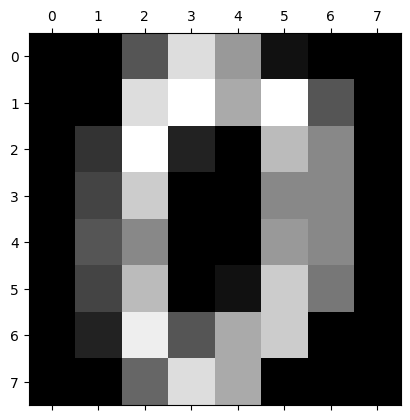

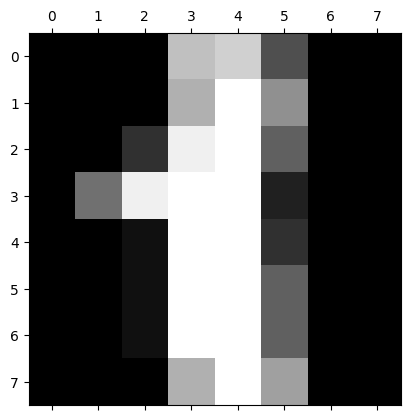

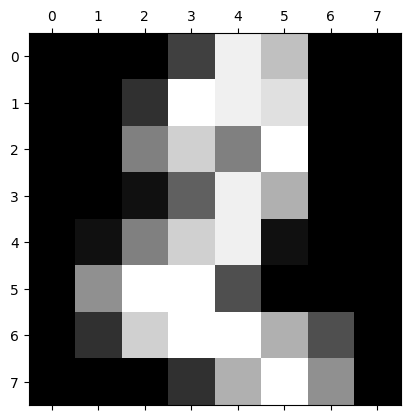

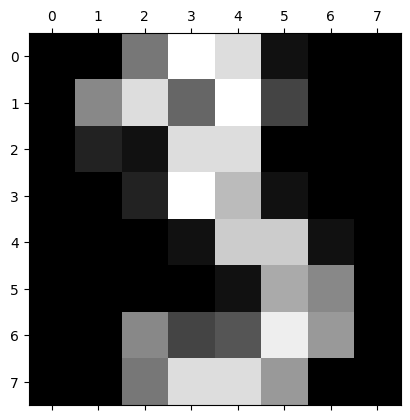

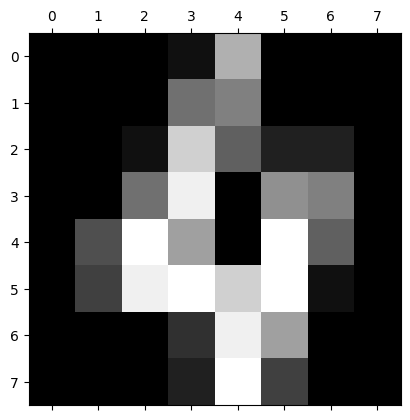

In [6]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

c:\users\danilo\pycharmprojects\machinelearning1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
model.score(x_test, y_test)

0.9583333333333334

In [11]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

In [14]:
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 29,  0,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 35,  0,  3],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

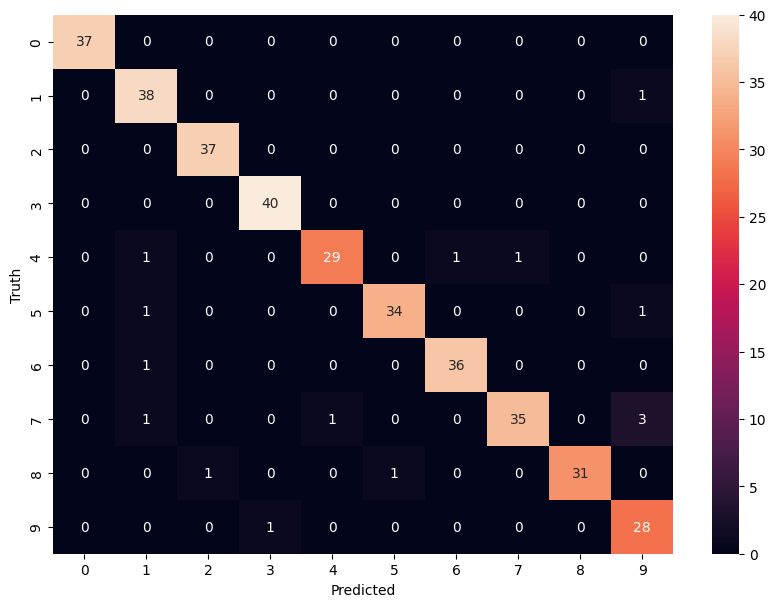

In [15]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')